In [1]:
%pylab
%matplotlib inline
import librosa
import scipy

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
%store -r song_data
song, fs = song_data

In [21]:
sxx = abs(scipy.signal.stft(song, nperseg=int(0.03*fs), noverlap=int(0.02*fs))[2])**2
sxx.shape

(331, 10500)

In [26]:
comps, acts = librosa.decompose.decompose(sxx, n_components=32)

C:\Users\ghage\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\ghage\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [27]:
comps.shape, acts.shape

((331, 32), (32, 10500))

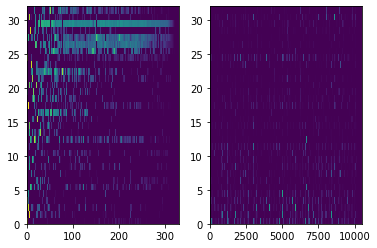

In [28]:
_, axs = subplots(1, 2)
axs[0].pcolormesh(np.log(comps.T+10e-5))
axs[1].pcolormesh(acts)

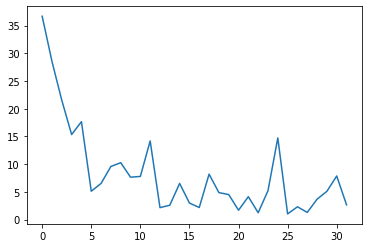

In [29]:
plot(np.sum(acts, axis=1))

In [55]:
rec = librosa.segment.recurrence_matrix(sxx[:, ::10], mode='affinity')

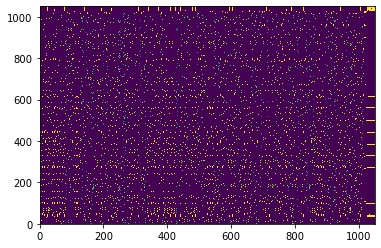

In [57]:
pcolormesh(np.log(rec+10e-5))